In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Build a simple CNN model for emotion detection
def build_emotion_model():
    model = Sequential()

    # Add convolutional layers
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Add fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(7, activation='softmax'))  

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the model
emotion_model = build_emotion_model()



In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  

# Training data generator (subset='training')
train_generator = train_datagen.flow_from_directory(
    'C:/Users/georg/OneDrive/Desktop/Deep Learning/Kundskapkontroll2/archive/train',  
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    subset='training')  

# Validation data generator (subset='validation')
validation_generator = train_datagen.flow_from_directory(
    'C:/Users/georg/OneDrive/Desktop/Deep Learning/Kundskapkontroll2/archive/train',  
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    subset='validation')  


Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.


In [11]:
validation_generator = train_datagen.flow_from_directory(
    'C:/Users/georg/OneDrive/Desktop/Deep Learning/Kundskapkontroll2/archive/test',  # Use 'test' as validation set
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical')


Found 7178 images belonging to 7 classes.


Epoch 1/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step - accuracy: 0.2669 - loss: 1.7870 - val_accuracy: 0.4113 - val_loss: 1.5343
Epoch 2/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 257s 358ms/step - accuracy: 0.3853 - loss: 1.5696 - val_accuracy: 0.4599 - val_loss: 1.4349
Epoch 3/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 136s 188ms/step - accuracy: 0.4269 - loss: 1.4758 - val_accuracy: 0.4765 - val_loss: 1.3628
Epoch 4/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 120s 166ms/step - accuracy: 0.4569 - loss: 1.4029 - val_accuracy: 0.4897 - val_loss: 1.3294
Epoch 5/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.4847 - loss: 1.3413 - val_accuracy: 0.5008 - val_loss: 1.3031
Epoch 6/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.5026 - loss: 1.3007 - val_accuracy: 0.5077 - val_loss: 1.2762
Epoch 7/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 80s 111ms/step - accuracy: 0.5207 - loss: 1.2436 - val_accuracy: 0.5123 - val_loss: 1.2720
Epoch 8/10
718/718 ━━━━━━━━━━━━━━━━━━━━ 79s 110ms/step - accuracy: 0.5344 - loss

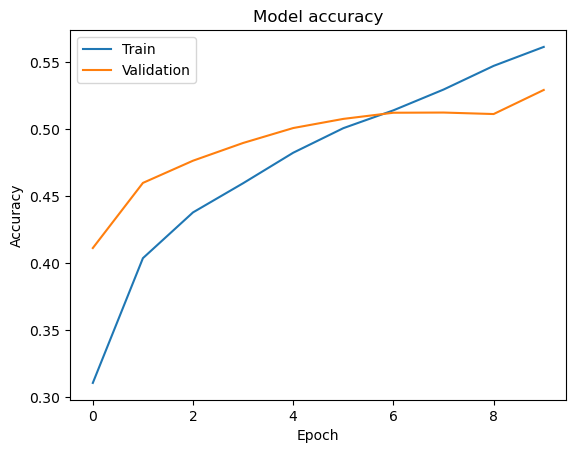

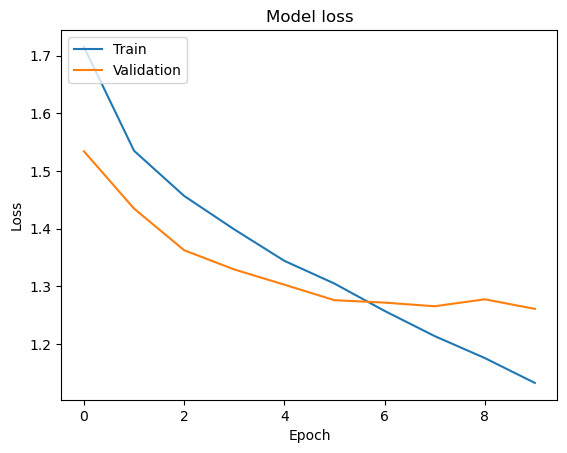

In [12]:
# Assuming your model is already built and compiled
# Example training process
history = emotion_model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10 
)

# Save the trained model
emotion_model.save('emotion_detection_model.h5')

# Optionally, you can plot the training history to evaluate performance
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [22]:
test_loss, test_accuracy = emotion_model.evaluate(validation_generator)  
print(f"Test Accuracy: {test_accuracy}")


225/225 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.5234 - loss: 1.2655
Test Accuracy: 0.5292560458183289
